# EDA on Penguins

In this notebook exercise, we will conduct simple EDA steps on the popular penguins dataset.

### Load the dataset

Dataset source: https://github.com/allisonhorst/palmerpenguins

In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('penguins')

In [3]:
df.shape

(344, 7)

# Step 1 Understand the Features

You can find information about this dataset here: https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris

**Question: in your own words**:
1. describe each feature
2. mention its type (numeric or categorical)
3. write its name in Arabic

Note: use a Markdown cell.

الفصيلة   categorical
طول المنقار   numeric
عمق المنقار   numeric
طول الارجل    numeric
وزن الجسم     numeric
الجزيره   categorical
الجنس    categorical

Hint: you can attach an image to illustrate what the features are.

<img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/culmen_depth.png" width="400">

# Step 2

- Have a look at the columns and their values (`head`, `sample`, `tail`)
- Look at the technical information (`info`)

In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# Step 3

1. For each column, check and handle missing values; state your strategy and justify it. Examples:
    - Strategy: drop the column. Justification: ...?
    - Strategy: fill missing values. Justificaiton: ...?
    - Strategy: drop the row. Justification: ...?
1. Calculate count and percentage of missing values before handling them
1. Check and handle duplicated rows
1. Calculate the percentage of data loss after cleaning

fill the missing values with the mean of the coulomn 
becuse its the option that will get the most out of the data 

In [6]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
df = df.dropna(axis=0)


In [8]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [9]:
df.duplicated()

0      False
1      False
2      False
4      False
5      False
       ...  
338    False
340    False
341    False
342    False
343    False
Length: 333, dtype: bool

No Duplicated 

# Step 4

#### Data types conversion
- We shall convert the string types to `category` to preserve memory
- numeric types can be stored in less precision: `float32`

In [10]:
mem_usage_before = df.memory_usage(deep=True)
print(mem_usage_before)

Index                 2664
species              18519
island               18333
bill_length_mm        2664
bill_depth_mm         2664
flipper_length_mm     2664
body_mass_g           2664
sex                  17979
dtype: int64


In [11]:
# convert categotical types
df['species'] = df['species'].astype('category')
df['island'] = df['island'].astype('category')
df['sex'] = df['sex'].astype('category')



bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g

In [12]:
# convert numerical types
df['bill_depth_mm']     = df['bill_depth_mm'].astype('float32')
df['bill_length_mm']    = df['bill_length_mm'].astype('float32')
df['flipper_length_mm'] = df['flipper_length_mm'].astype('float32')
df['body_mass_g']       = df['body_mass_g'].astype('float32')


Calculate memory saved after type conversion

In [13]:
mem_usage_after = df.memory_usage(deep=True)
print(mem_usage_after)

Index                2664
species               609
island                608
bill_length_mm       1332
bill_depth_mm        1332
flipper_length_mm    1332
body_mass_g          1332
sex                   549
dtype: int64


In [14]:
print('memory saved:', (mem_usage_before - mem_usage_after).sum() // 1024, 'KB')

memory saved: 57 KB


# Step 5

#### Detect inconsistency in categorical values

The categorical columns should be checked for any inconsistencies. For example. We look for lowercase, uppercase, or inconsistent use of codes (e.g., "M", "F") with non-codes (e.g., "Male", "Female")  in the `sex` column.

- hint: use `.unique()` to check the number of unique values in a column
- you can also use: `.value_counts()` to check the frequency of each value in a column

In [18]:
df['sex'].value_counts()  #333   all = 343
df['sex'].unique() 

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

In [23]:
df['island'].value_counts()
df['island'].unique()


['Torgersen', 'Biscoe', 'Dream']
Categories (3, object): ['Biscoe', 'Dream', 'Torgersen']

In [24]:
df['species'].value_counts()
df['species'].unique()

['Adelie', 'Chinstrap', 'Gentoo']
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']

# Step 6: Univariate Analysis

- Separate numerical from categorical columns (hint; use `df.select_dtypes()`)
- Look at the statistical information for each:
    - `df_num.describe().T`
    - `df_cat.describe().T`

In [101]:
df_num = df.select_dtypes('float')

In [30]:
df_cat = df.select_dtypes('category')

In [36]:
df_cat.describe().T

,count,unique,top,freq
species,333,3,Adelie,146
island,333,3,Biscoe,163
sex,333,2,Male,168


In [34]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,333.0,43.992794,5.468668,32.099998,39.5,44.500000,48.599998,59.599998
bill_depth_mm,333.0,17.164865,1.969235,13.100000,15.6,17.299999,18.700001,21.500000
flipper_length_mm,333.0,200.966965,14.015767,172.000000,190.0,197.000000,213.000000,231.000000
body_mass_g,333.0,4207.057129,805.215820,2700.000000,3550.0,4050.000000,4775.000000,6300.000000


Use charts to plot `value_counts()` categorical variables:
1. plot `species` using bar plot
1. plot `island` using pie chart
1. plot `sex` using horizontal bar plot

<Axes: xlabel='species'>

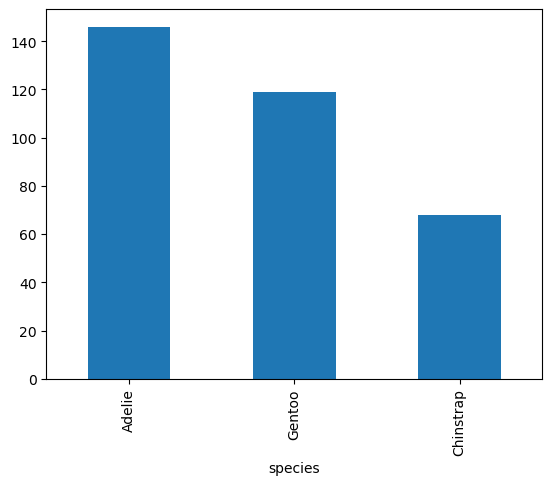

In [69]:
df['species'].value_counts().plot(kind= 'bar') 

<Axes: ylabel='count'>

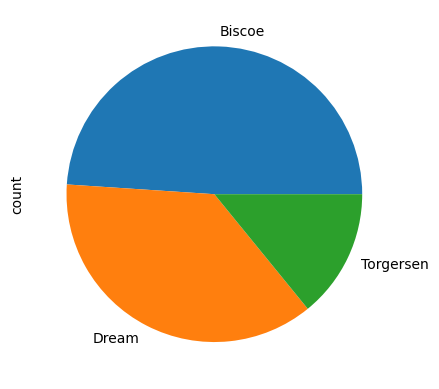

In [64]:
df['island'].value_counts().plot(kind= 'pie')

<Axes: ylabel='sex'>

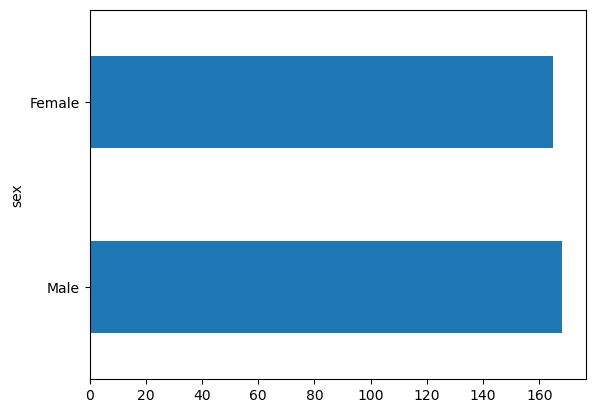

In [84]:
df['sex'].value_counts().plot(kind= 'barh') 

Plot numerical variables:

1. Boxplot: `bill_length_mm`
1. Histogram: `bill_depth_mm`
1. Boxplot: `flipper_length_mm`
1. Histogram: `body_mass_g`

<Axes: ylabel='Frequency'>

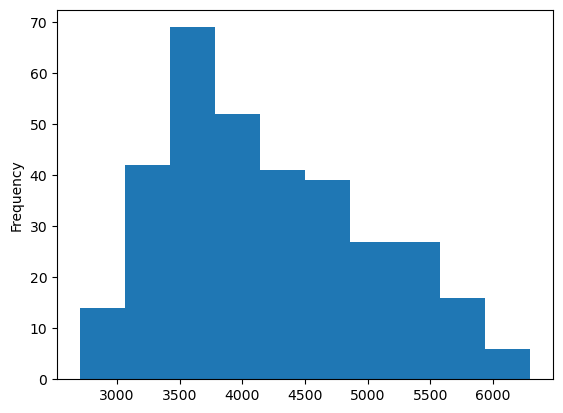

In [75]:
df['body_mass_g'].plot(kind= 'hist')

<Axes: >

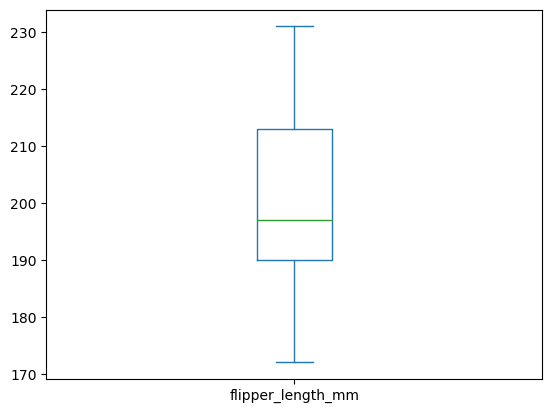

In [74]:
df['flipper_length_mm'].plot(kind= 'box')

<Axes: ylabel='Frequency'>

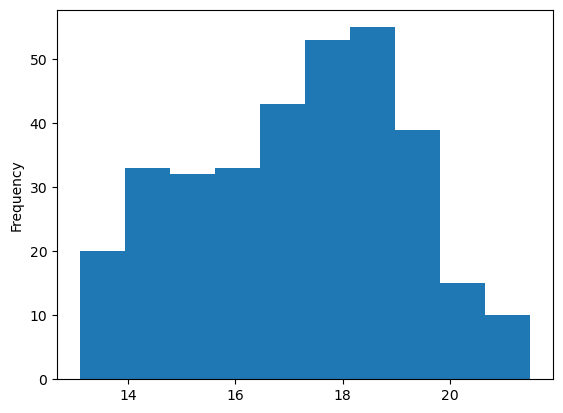

In [73]:
df['bill_depth_mm'].plot(kind='hist')

<Axes: ylabel='Frequency'>

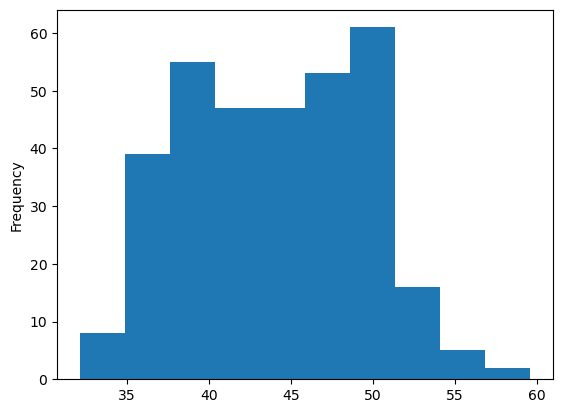

In [83]:
df['bill_length_mm'].plot(kind='hist')

<Axes: >

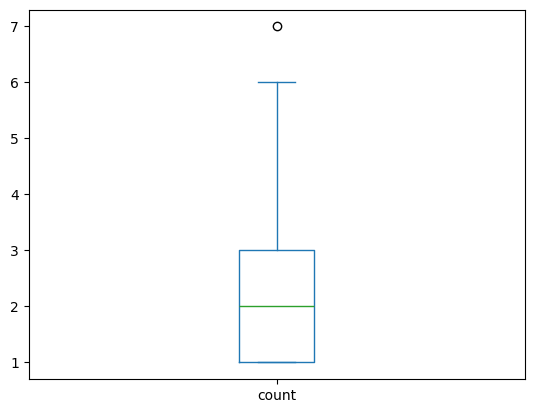

In [72]:
df['bill_length_mm'].plot(kind= 'box')

## Step 7: Bivariate Analysis

#### Correlation between numerical features

Let's find out if there is any correlation between numerical features.

- Hint: you can use the `df.corr()` to find the correlation matrix.
- Hint: you can use `sns.heatmap()` to plot the correlation matrix

In [77]:
df_num.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


<Axes: >

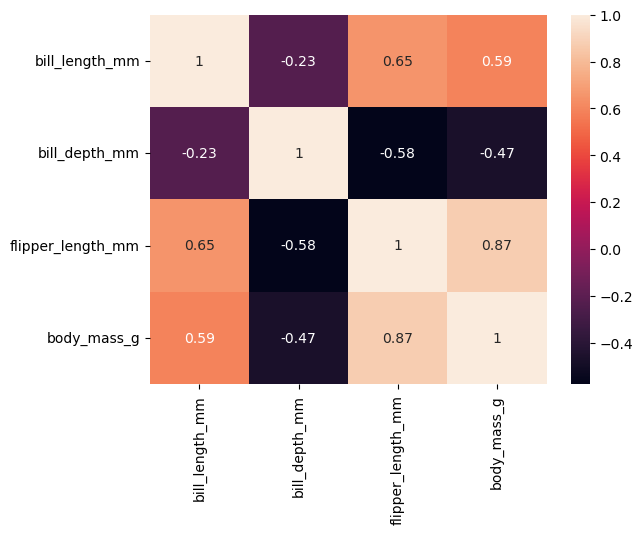

In [82]:
import seaborn as sns
sns.heatmap(df_num.corr(), annot=True)

Write down your observations based on the correlation heatmap.

Observations:

1 - we know that Adelei is the most pubuler specie

2 - we know that Biscoe is the most populated island

3 - penguins sex are equily distrputed 

4- the most commen bady mass is between 3500-4000

5 - the body mass and the flepper size relation is vary positev  

5 - the bill length and depth is vary negative 

6 - the biger the body the the higer the length of the bill 

7 - the bigger the body mass the the less bill depth

8 - the bigger the flepper the bigger the bill length








### Feature Engineering

- We might try adding the feature `bill_size` which is the product of `bill_length` and `bill_depth` to see if it has any significance in the model.
- We might also try `bill_ratio` which is the ratio of `bill_length` to `bill_depth` to see if it has any significance in the model.

In [89]:
df['bill_size']   = df['bill_length_mm'] * df['bill_depth_mm']
df['bill_ratio']  = df['bill_length_mm'] / df['bill_depth_mm']

In [90]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_size,bill_ratio
0,Adelie,Torgersen,39.099998,18.700001,181.0,3750.0,Male,731.169983,2.090909
1,Adelie,Torgersen,39.500000,17.400000,186.0,3800.0,Female,687.299988,2.270115
2,Adelie,Torgersen,40.299999,18.000000,195.0,3250.0,Female,725.399963,2.238889
4,Adelie,Torgersen,36.700001,19.299999,193.0,3450.0,Female,708.309998,1.901554
5,Adelie,Torgersen,39.299999,20.600000,190.0,3650.0,Male,809.580017,1.907767


Let's look at the correlation to see whether the newly created features are better.

<Axes: >

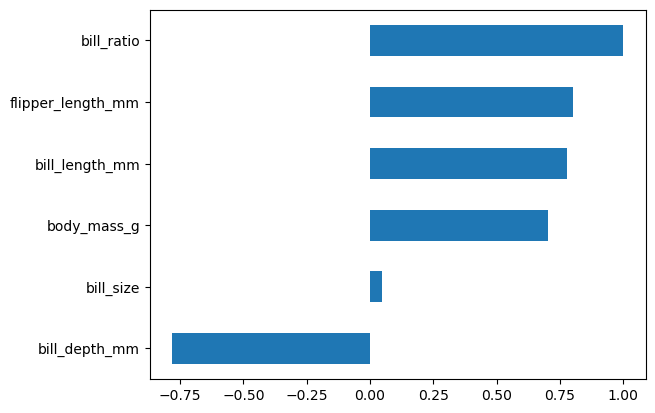

In [102]:
# This plots the correlation values for a specific column
# which is usually what we are interested in

# corr['body_mass_g'].sort_values().plot.barh()
df_num.corr()['bill_ratio'].sort_values().plot.barh()

In [103]:
df_num.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,bill_size,bill_ratio
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.661467,0.779230
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,0.575513,-0.781246
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.086512,0.801980
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.104220,0.702179
bill_size,0.661467,0.575513,0.086512,0.104220,1.000000,0.048658
bill_ratio,0.779230,-0.781246,0.801980,0.702179,0.048658,1.000000
